**1. Data Exploration:**

**2. Data Preprocessing:**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train=pd.read_csv(r"/content/Titanic_train.csv")
test=pd.read_csv(r"/content/Titanic_test.csv")

In [7]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [8]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [12]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,0


In [14]:
train['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [15]:
train['Embarked'].fillna('S',inplace=True)

<ipython-input-15-6702a28d6ea0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna('S',inplace=True)


In [16]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [17]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

<ipython-input-17-70a358ee845c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].mean(),inplace=True)


In [18]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [19]:
(177/891)*100

19.865319865319865

<ipython-input-20-22ed6932e5e8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


<Axes: xlabel='Age', ylabel='Density'>

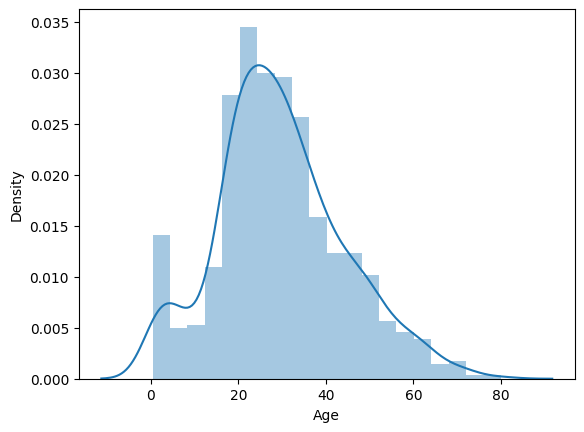

In [20]:
sns.distplot(train['Age'])

In [21]:
train_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),177)

In [22]:
test_age=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(),86)

In [23]:
train['Age'][train['Age'].isnull()]=train_age

<ipython-input-23-603ae26aeeb9>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train['Age'][train['Age'].isnull()]=train_age
<ipython-input-23-603ae26aeeb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [24]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [25]:
test['Age'][test['Age'].isnull()]=test_age

<ipython-input-25-abf9310a3d93>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['Age'][test['Age'].isnull()]=test_age
<ipython-input-25-abf9310a3d93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [26]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [27]:
train[train['Pclass']==3]['Survived'].value_counts()

,count
Survived,
0,372
1,119


In [28]:
train.groupby(['Pclass'])['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [29]:
119/(372+119)

0.24236252545824846

In [30]:
train.groupby(['Sex'])['Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [31]:
train.groupby(['Embarked'])['Survived'].mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [32]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


<ipython-input-33-22ed6932e5e8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


<Axes: xlabel='Age', ylabel='Density'>

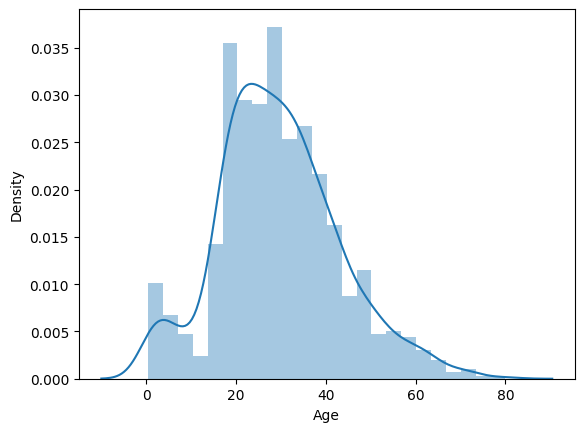

In [33]:
sns.distplot(train['Age'])

<ipython-input-34-99cf7a3b9057>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])
<ipython-input-34-99cf7a3b9057>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==1])


<Axes: xlabel='Age', ylabel='Density'>

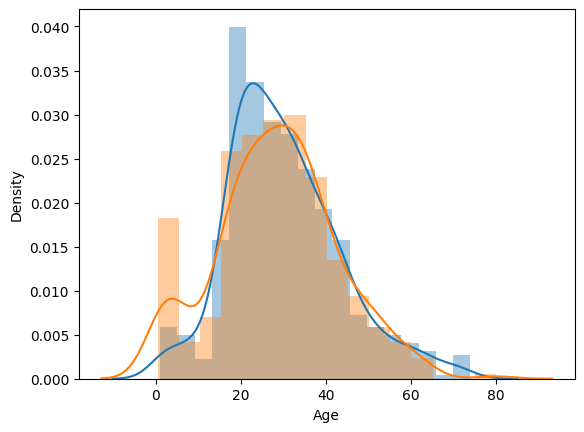

In [34]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

<ipython-input-35-7ccb192c3cd9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==0])
<ipython-input-35-7ccb192c3cd9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==1])


<Axes: xlabel='Fare', ylabel='Density'>

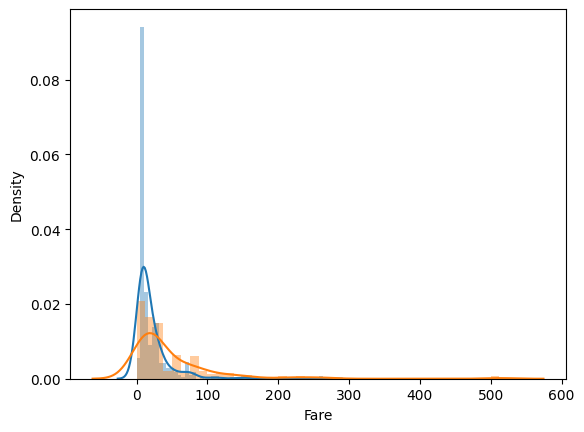

In [35]:
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1])

In [36]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

In [37]:
train['family']=train['SibSp']+train['Parch']+1

In [38]:
test['family']=test['SibSp']+test['Parch']+1

In [39]:
train['family'].value_counts()

,count
family,
1,537
2,161
3,102
4,29
6,22
5,15
7,12
11,7
8,6


In [40]:
test['family'].value_counts()

,count
family,
1,253
2,74
3,57
4,14
5,7
7,4
11,4
6,3
8,2


In [41]:
train.groupby(['family'])['Survived'].mean()

,Survived
family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [42]:
def cal(number):
    if number==1:
        return"Alone"
    elif number>1 and number<5:
        return "Medium"
    else:
        return "Large"


In [43]:
train['family_size']=train['family'].apply(cal)

In [44]:
test['family_size']=test['family'].apply(cal)

In [45]:
train.drop(columns=['SibSp','Parch','family'],inplace=True)
test.drop(columns=['SibSp','Parch','family'],inplace=True)

In [46]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [47]:
passengerId=test['PassengerId'].values

In [48]:
train.drop(columns=['Name','PassengerId'],inplace=True)
test.drop(columns=['Name','PassengerId'],inplace=True)

In [49]:
train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0
Embarked,0
family_size,0


In [50]:
train=pd.get_dummies(train,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [51]:
train.shape

(891, 10)

In [52]:
test=pd.get_dummies(test,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)


In [53]:
test.shape

(418, 9)

**3. Model Building:**

In [54]:
train

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,0,22.0,7.2500,False,True,True,False,True,False,True
1,1,38.0,71.2833,False,False,False,False,False,False,True
2,1,26.0,7.9250,False,True,False,False,True,False,False
3,1,35.0,53.1000,False,False,False,False,True,False,True
4,0,35.0,8.0500,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,True,False,True,False,True,False,False
887,1,19.0,30.0000,False,False,False,False,True,False,False
888,0,18.0,23.4500,False,True,False,False,True,False,True
889,1,26.0,30.0000,False,False,True,False,False,False,False


In [55]:
x=train.iloc[:,1:10].values
y=train.iloc[:,0].values

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [57]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [58]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
y_pred=classifier.predict(x_test)

In [78]:
from sklearn.metrics import roc_curve, auc

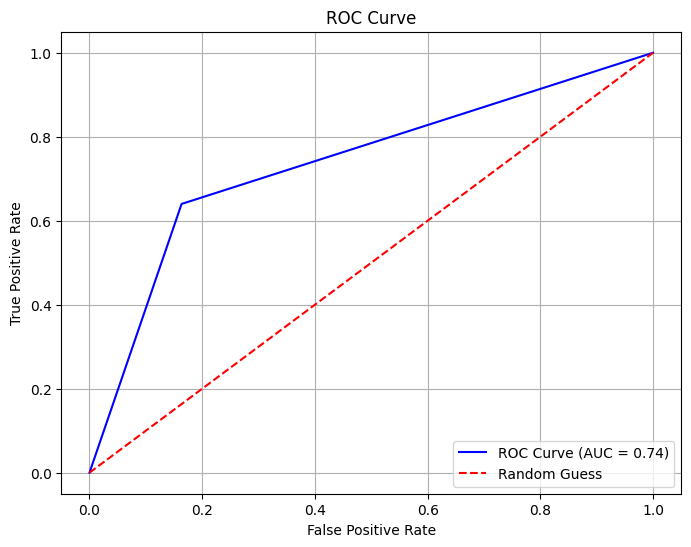

In [79]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
#Model Performance:
#The blue line represents the ROC curve for the model, and the area under this curve (AUC) is 0.74.
#An AUC of 0.74 indicates that the model has moderate performance in distinguishing between the positive and negative classes.
#A perfect model would have an AUC of 1.0, while a random classifier would have an AUC of 0.5.
#Trade-off Between TPR and FPR:
#The True Positive Rate (TPR, or Sensitivity) increases as the False Positive Rate (FPR) increases.
#The curve indicates the thresholds at which the classifier balances TPR and FPR. Depending on the use case, you may select a threshold that optimizes one metric over the other.
#Comparison with Random Guess:
#The red dashed line represents a random guess (AUC = 0.5). The model's ROC curve being above this line shows that it performs better than random guessing.
#Practical Implications:
#The moderate AUC score suggests that the model has room for improvement. Possible strategies include feature engineering, hyperparameter tuning, or trying a different classification algorithm.
#Threshold Tuning:
#By examining this curve, one can choose a threshold for classification that balances the TPR and FPR based on the application’s requirements (e.g., favoring sensitivity over specificity or vice versa).

**4. Model Evaluation:**

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7541899441340782

In [61]:
xf=test.iloc[:,:].values

In [62]:
y_final=classifier.predict(xf)

In [63]:
y_final.shape

(418,)

In [64]:
passengerId.shape

(418,)

In [65]:
final=pd.DataFrame()

In [66]:
final

""


In [67]:
final['passengerId']=passengerId
final['survived']=y_final

In [68]:
final

,passengerId,survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [69]:
from sklearn.preprocessing import StandardScaler

x=train.iloc[:,1:10].values
y=train.iloc[:,0].values

In [70]:
scaler=StandardScaler()
x_data=scaler.fit_transform(x)
y_data=y=train.iloc[:,0].values

In [71]:
from pickle import dump
from pickle import load

In [72]:
dump(classifier,open('classifier.sav','wb'))
dump(scaler,open('scaler.sav','wb'))

In [73]:
loaded_model=load(open('classifier.sav','rb'))

In [74]:
result=loaded_model.score(x,y)
print(result)

0.9349046015712682


In [75]:
loaded_model.predict(np.reshape([1,2,3,4,5,6,7,8,9],(1,9)))

array([1])

**5. Interpretation:**

**6. Deployment with Streamlit:**

In [76]:
!streamlit run DLR 1.py

/bin/bash: line 1: streamlit: command not found


In [77]:
#exploring on roc curve
#Receiver Operating Characteristic (ROC) Curve
#he ROC curve is a graphical representation used to evaluate the performance of a binary classification model by illustrating the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) at various threshold levels.
#It is a key metric for understanding how well a model distinguishes between classes.
#Key Concepts
#True Positive Rate (TPR) or Sensitivity:𝑇𝑃𝑅=True Positives (TP)/True Positives (TP) + False Negatives (FN)
#Measures the proportion of actual positives correctly identified.
#False Positive Rate (FPR):𝐹𝑃𝑅=False Positives (FP)/False Positives (FP) + True Negatives (TN)
#Threshold:
#A decision boundary that determines whether a predicted probability is classified as positive or negative.
#Different thresholds result in different TPR and FPR values.
#How the ROC Curve is Constructed
#X-axis: False Positive Rate (FPR).
#Y-axis: True Positive Rate (TPR).
#Points on the Curve: Each point corresponds to a specific threshold.
#Lower thresholds classify more instances as positive, increasing TPR but also FPR.
#Higher thresholds classify fewer instances as positive, decreasing both TPR and FPR.
#Area Under the Curve (AUC)
#AUC (Area Under the Curve): A scalar value summarizing the ROC curve's performance.
# It represents the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance.
#Advantages of the ROC Curve
#Threshold-independent: Evaluates model performance at all possible classification thresholds.
#Handles Imbalanced Data: Focuses on true and false positives/negatives rather than raw accuracy, making it robust for imbalanced datasets.
#Visual Comparison: Easy to compare the performance of multiple models.



**1. What is the difference between precision and recall?**

**Answer: Precision and recall are both metrics used to evaluate the performance of classification models, especially in tasks like binary classification(eg., spam detection, medical diagnosis).**

**1. Precision: Precision measures the accuracy of positive predictions made by the model. it's ratio of true positive predicitions to the total number of positive predicitions made by the model. in simpler terms, precision answers the question:" out of all the instances the model predicted as positive, how many were actually positive?"**

**2. Recall: Recall, also known as sensitivity or true positive rate, measures the ability of the model to capture all the relevant instances in the dataset. it's the ratio of true positive predictions to the total number of actual positive instances in the dataset. Recall answers the question:" out of all the actual positive instances, how many did the model correctly identify?"**

**In summary, precision focuses on the accuracy of positive predictions, while recall focuses on the model's ability to find all the relevant instances.**

**2. What is cross-validation, and why is it important in binary classification?**

**Answer: Cross-validation is a technique used to assess the performance of a machine learning model by spliting the dataset into multiple subsets(folds). the model is trained on a portion of the data and then tested on the remaining data. This process is repeated multiple times, with different subsets used for training and testing each time.**

**Cross-validation is important in binary classification(and other machine learning tasks) for several reasons:**

**1. Evaluating Model Performance: It provides a more accurate estimate of how well the model will generalize to new, unseen data compared to simply splitting the data into training and testing sets once.This is crucial for assessing the model's performance in real-world scenarios.**

**2. Reducing Bias: By using multiple subsetsof the data for training and testing ,cross-validation helps reduce the potential bias introduced by a single train-test split. it ensures that the model's performance is not overly optimastic or pessimistic due to the specific subset of data used for testing.**

**3. Optimizing Hyperparameters: Cross-validation can be used to tune the model's hyperparameters(eg.,regularization strength, learning rate) by comparing performance across different parameter values.This helps in finding the optimal set of hyperparameters that result in the best model performance.**

**4. Handling Limited Data: In case where the dataset is small, cross-validation allows for more efficient use of the available data by repeatedly utilizing each data point for both training and testing, thereby maximizing the information gained from the dataset.**

**Overall, cross-validation provides a robust method for evaluating and fine-tuning binary classification models,leading to more reliable and accurate predictions.**